In [29]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr

In [2]:
def south_pole_map(cols=1, rows=1, fig_size=(12,8), max_extent=-50, facecolor='white'):
    ''' 
    User note: In order to call the function, begin cell with: fig, ax = south_pole_map(**args).
    
    Neglecting "fig, ax =" at the begeinning will not map your data to the existing axes.
    
    This function sets up a polar projection centered at the South Pole, which DataArrays can be plotted over.
    
    Optional arguments accepted for figure size, maximum (northward) extent and facecolor. Any number of columns and/or rows are also accepted for multiple subplots.
    
    If creating multiple subplots, ax=ax[*index*] must be passed in the plot call for each array.
    
    By default, these are set to (12,8), -50ºS and gray, respectively. Columns/Rows set to 1 by default – specifying axes in which to plot data is not necessary when using default column number.
    '''
    import matplotlib.path as mpath
    import numpy as np
    import cartopy.crs as ccrs
    
    fig,ax = plt.subplots(figsize=fig_size, ncols=cols, nrows=rows, subplot_kw={'projection': ccrs.SouthPolarStereo(), 'facecolor':facecolor}, layout='constrained')

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    if rows>1 and cols>1:
        for i in range(rows):
            for j in range(cols):
                ax[i,j].set_boundary(circle, transform=ax[i,j].transAxes)

                # lat/long map extents. shows south pole out to 50ºS
                ax[i,j].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif cols>1 and rows==1:
        for i in range(cols):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif rows>1 and cols==1:
        for i in range(rows):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    else:
        ax.set_boundary(circle, transform=ax.transAxes)

            # lat/long map extents. shows south pole out to 50ºS
        ax.set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    
    
    #must return fig, ax when creating multiple subplots in a function
    return fig, ax

First import the masks into the notebook, to find them follow the path used to open them in the code below.

In [3]:
#importing .nc files which contain the masks, in this notebook I named them mask_CM4 and mask_ESM4
mask_CM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/CM4_mask_antarctica.nc')
mask_ESM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/ESM4_mask_antarctica.nc')

To see the names of the individual masks in the dataset you can just enter the name of the data set and it shows every masks name. This is needed for plotting the masks. The orog data set can be ignored for plotting as it is there to fit all of the masks to the entire continent of Antarctica.

In [4]:
mask_CM4

<xarray.Dataset>
Dimensions:        (lat: 180, lon: 288)
Coordinates:
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon            (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
Data variables:
    orog           (lat, lon) float32 ...
    ross_CM4       (lat, lon) float32 ...
    filchner_CM4   (lat, lon) float32 ...
    peninsula_CM4  (lat, lon) float32 ...
    loweast_CM4    (lat, lon) float32 ...
    lowwest_CM4    (lat, lon) float32 ...
    plateau_CM4    (lat, lon) float32 ...

In [5]:
mask_ESM4

<xarray.Dataset>
Dimensions:         (lat: 180, lon: 288)
Coordinates:
  * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon             (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
Data variables:
    orog            (lat, lon) float32 ...
    ross_ESM4       (lat, lon) float32 ...
    filchner_ESM4   (lat, lon) float32 ...
    peninsula_ESM4  (lat, lon) float32 ...
    loweast_ESM4    (lat, lon) float32 ...
    lowwest_ESM4    (lat, lon) float32 ...
    plateau_ESM4    (lat, lon) float32 ...

Now that the masks are imported and we have the names we can use them to plot temperature data on them.

In [6]:
#Importing temperature data for ESM4, and CM4
temperature_pi_ESM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_esm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

temperature_pi_CM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_cm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)



In [113]:
temperature_pi_CM4.time.max

<bound method DataArrayAggregations.max of <xarray.DataArray 'time' (time: 1140)>
array([cftime.DatetimeNoLeap(251, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(251, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(251, 3, 16, 12, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(350, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(350, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(350, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0251-01-16 12:00:00 ... 0350-12-16 12:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  NOLEAP
    bounds:         time_bnds>

In [7]:
#Isolating the temperature data from the data set to use on plot, using CM4 data 
temp_CM4 = temperature_pi_CM4.temp
temp_ESM4 = temperature_pi_ESM4.temp

In [8]:
temp_CM4

<xarray.DataArray 'temp' (time: 1140, pfull: 33, lat: 180, lon: 288)>
dask.array<concatenate, shape=(1140, 33, 180, 288), dtype=float32, chunksize=(1, 33, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * pfull    (pfull) float64 2.164 5.845 10.75 17.11 ... 975.6 985.4 992.8 997.9
  * time     (time) object 0251-01-16 12:00:00 ... 0350-12-16 12:00:00
Attributes:
    long_name:      temperature
    units:          K
    valid_range:    [100. 350.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order2

To plot data over the mask you take the data set you want to use then multiply it by the mask. You have to take the name of the data set in this scenario I had named it mask_CM4 when I imported it, then do .maskname. I used lowwest_CM4 for this one. Then after multiplying the two, you want to take that variable and mean the other variables so the data is only lat and lon.

In [9]:
plateau_temp=(temp_CM4*(mask_CM4.plateau_CM4))
plateau_test=plateau_temp.mean(dim='time').mean(dim='pfull')

In [10]:
peninsula_temp=(temp_CM4*(mask_CM4.peninsula_CM4))
peninsula_test=peninsula_temp.mean(dim='time').mean(dim='pfull')

In [11]:
loweast_temp=(temp_CM4*(mask_CM4.loweast_CM4))
loweast_test=loweast_temp.mean(dim='time').mean(dim='pfull')

In [12]:

lowwest_temp=(temp_CM4*(mask_CM4.lowwest_CM4))
lowwest_test=lowwest_temp.mean(dim='time').mean(dim='pfull')

In [13]:
lowwest_temp



<xarray.DataArray (time: 1140, pfull: 33, lat: 180, lon: 288)>
dask.array<mul, shape=(1140, 33, 180, 288), dtype=float32, chunksize=(1, 33, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * pfull    (pfull) float64 2.164 5.845 10.75 17.11 ... 975.6 985.4 992.8 997.9
  * time     (time) object 0251-01-16 12:00:00 ... 0350-12-16 12:00:00

Now we have our variable lowwest_test which is ready to be plotted which can be done as follows:

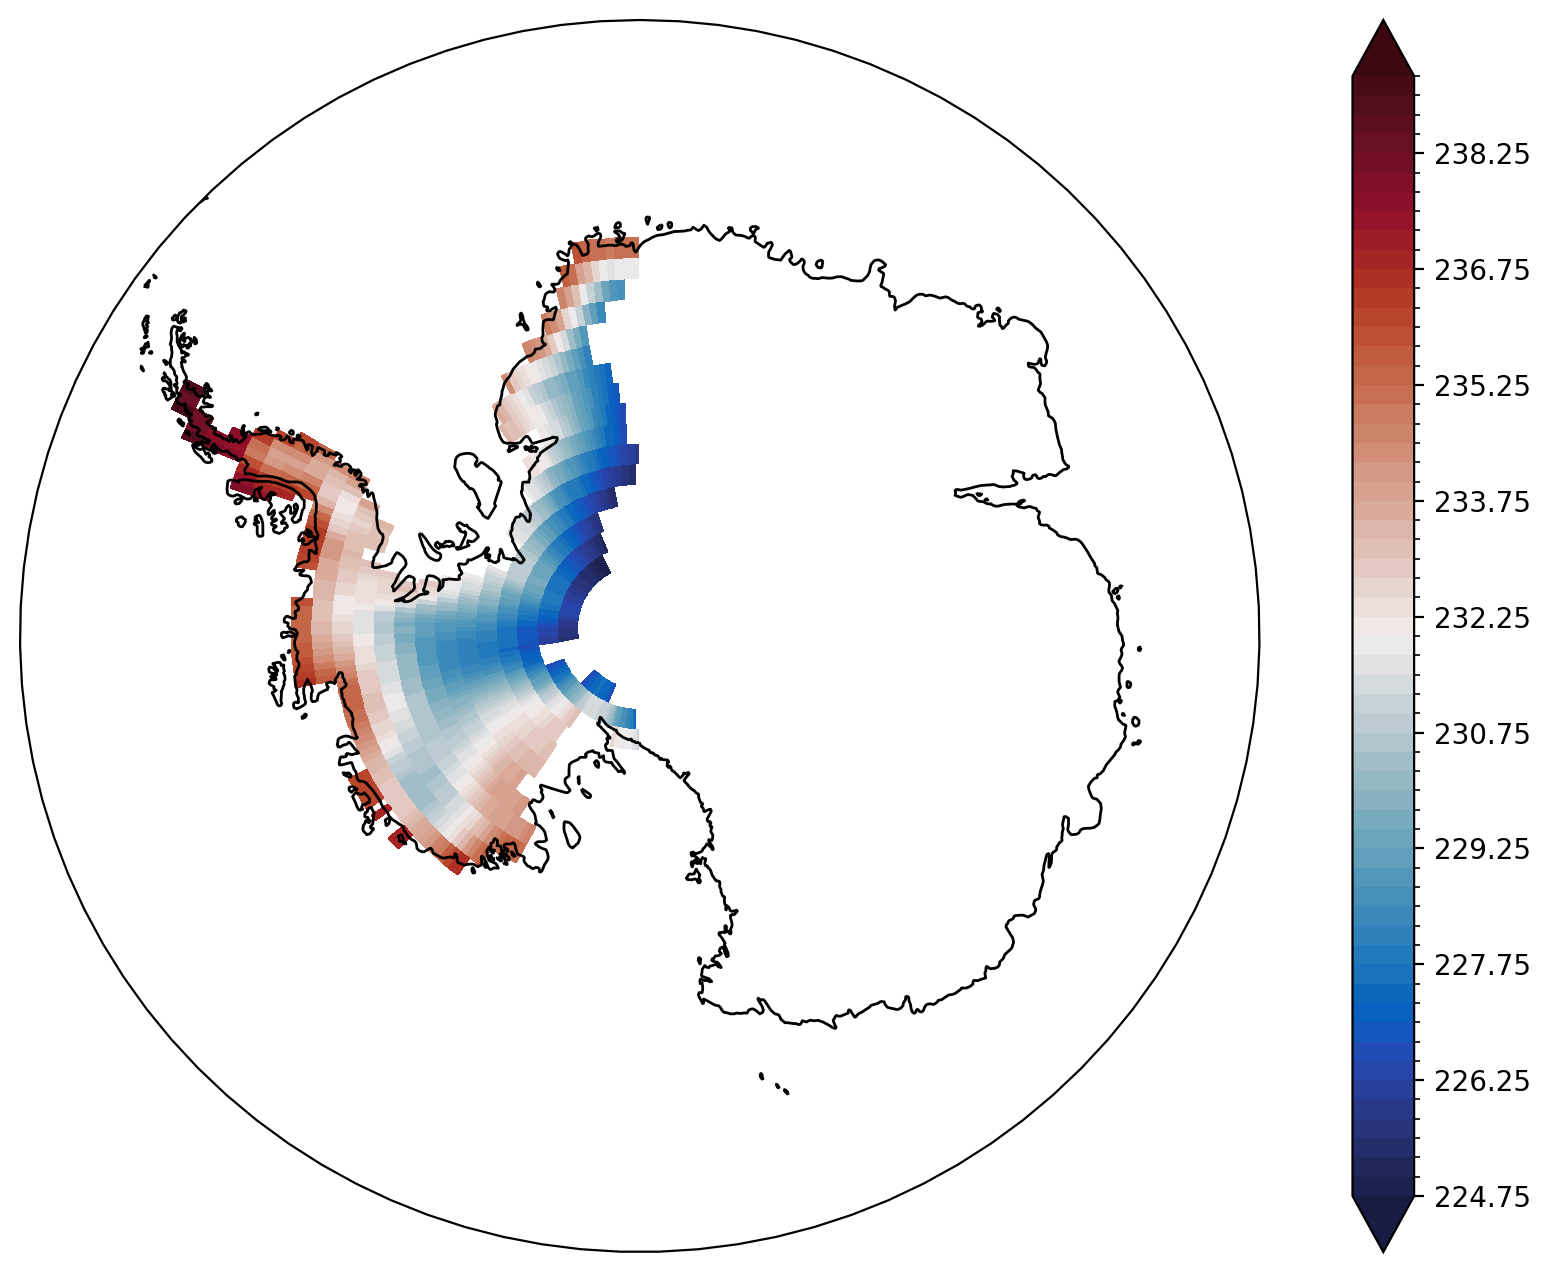

In [14]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
lowwest_test.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

The code above produces a plot of all of Antarctica with just the low west region colored as we specified we want temperature data only on the region marked as low west.

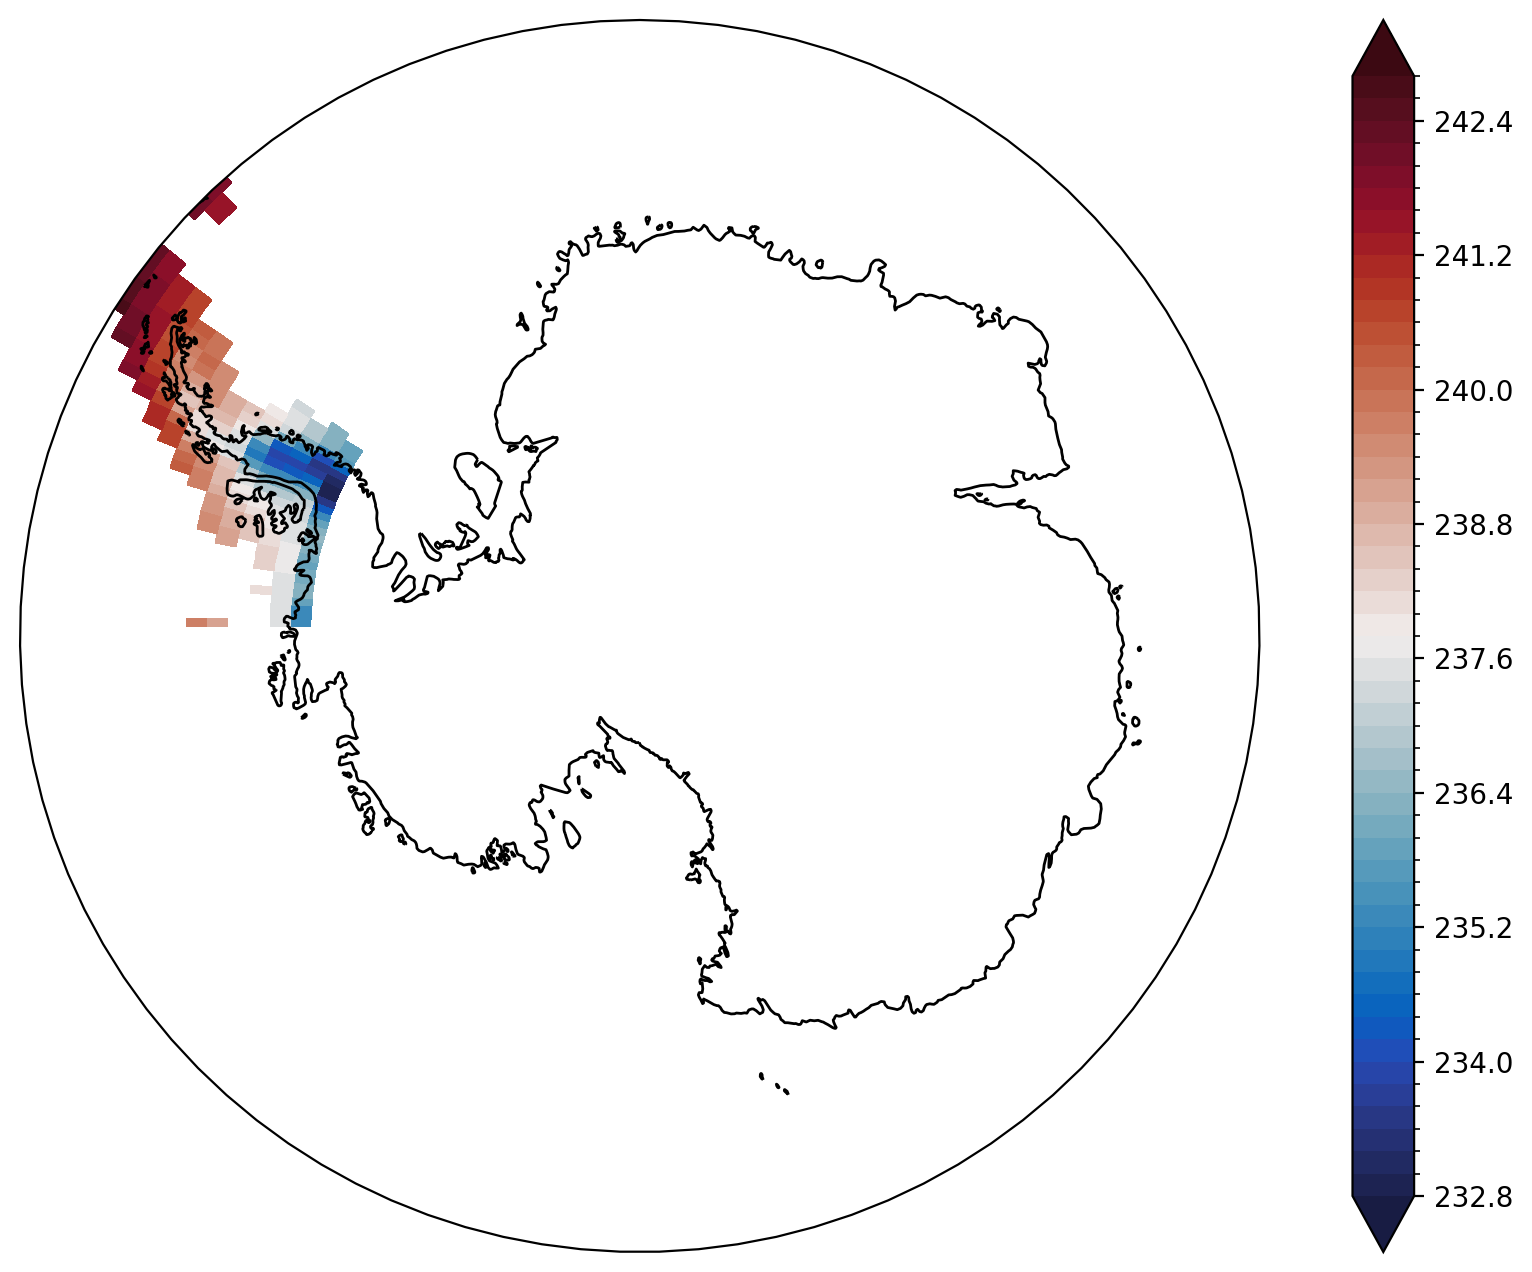

In [15]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
peninsula_test.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

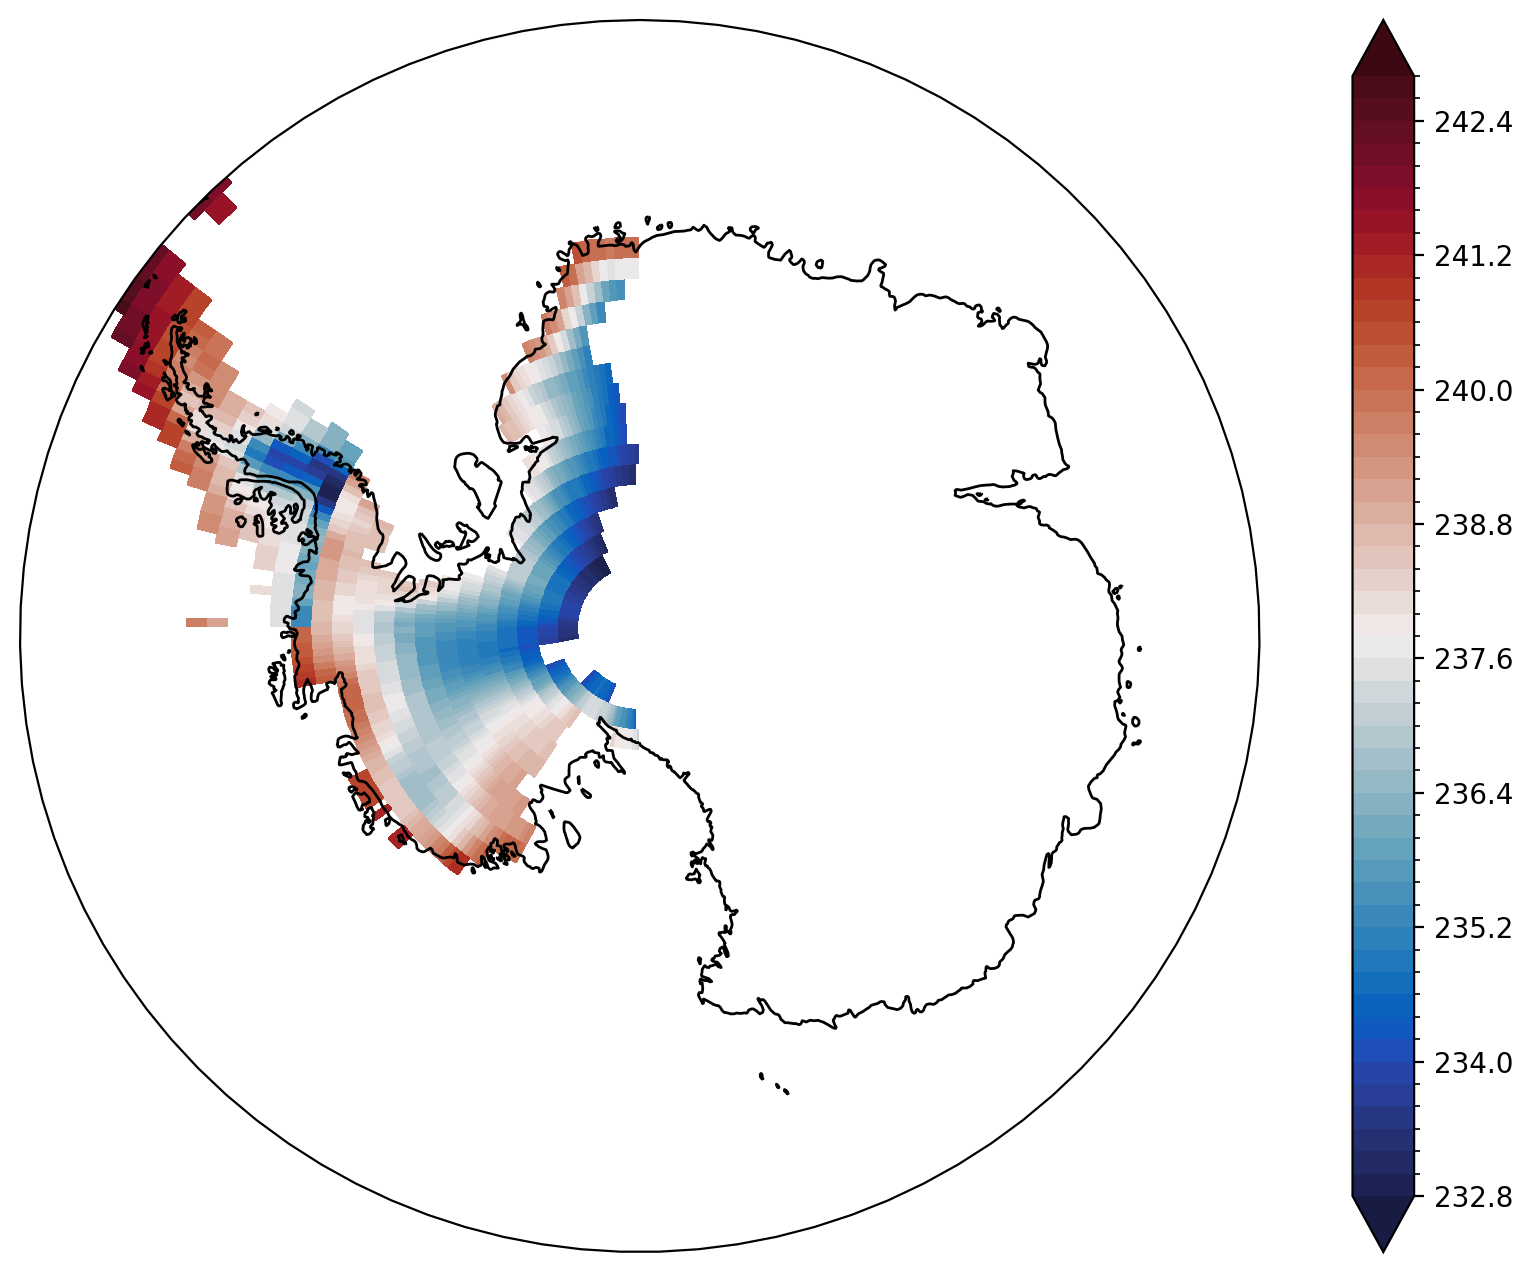

In [16]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
lowwest_test.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance, levels=60,add_colorbar=False)
peninsula_test.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance, levels=60)

            
   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

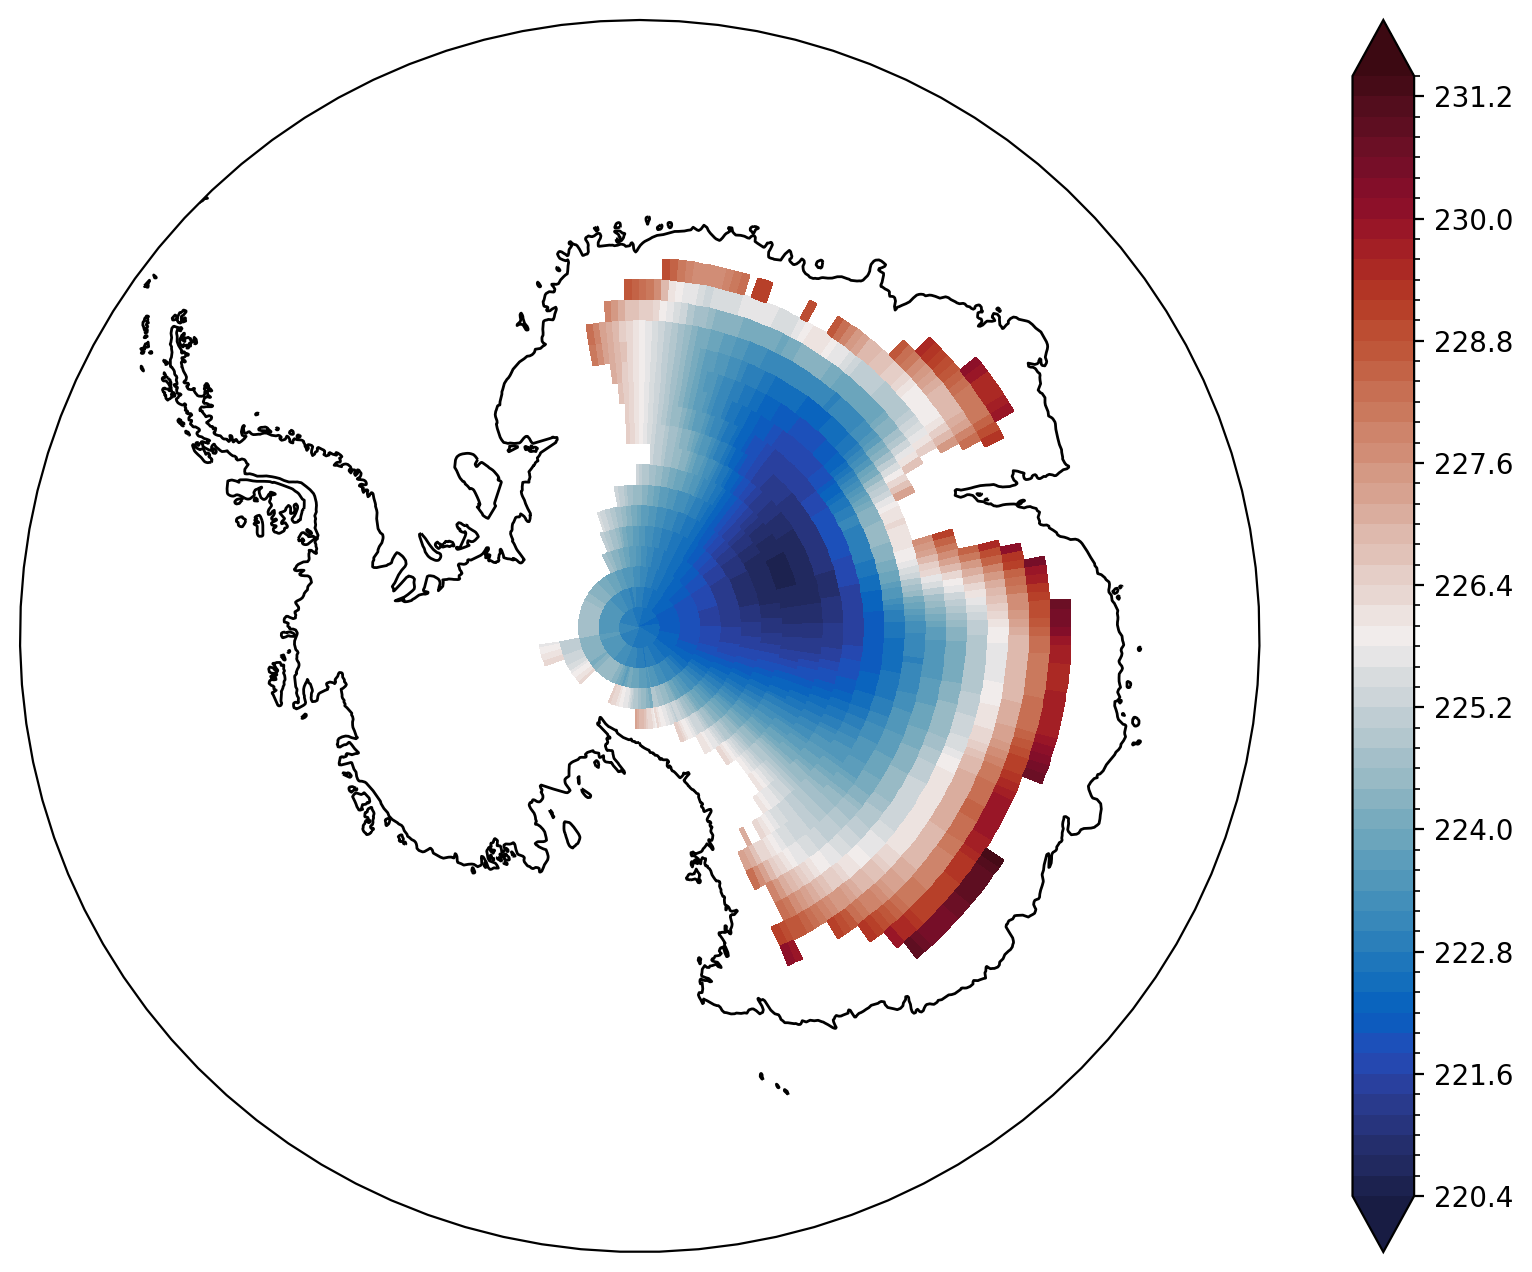

In [17]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
plateau_test.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


   
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

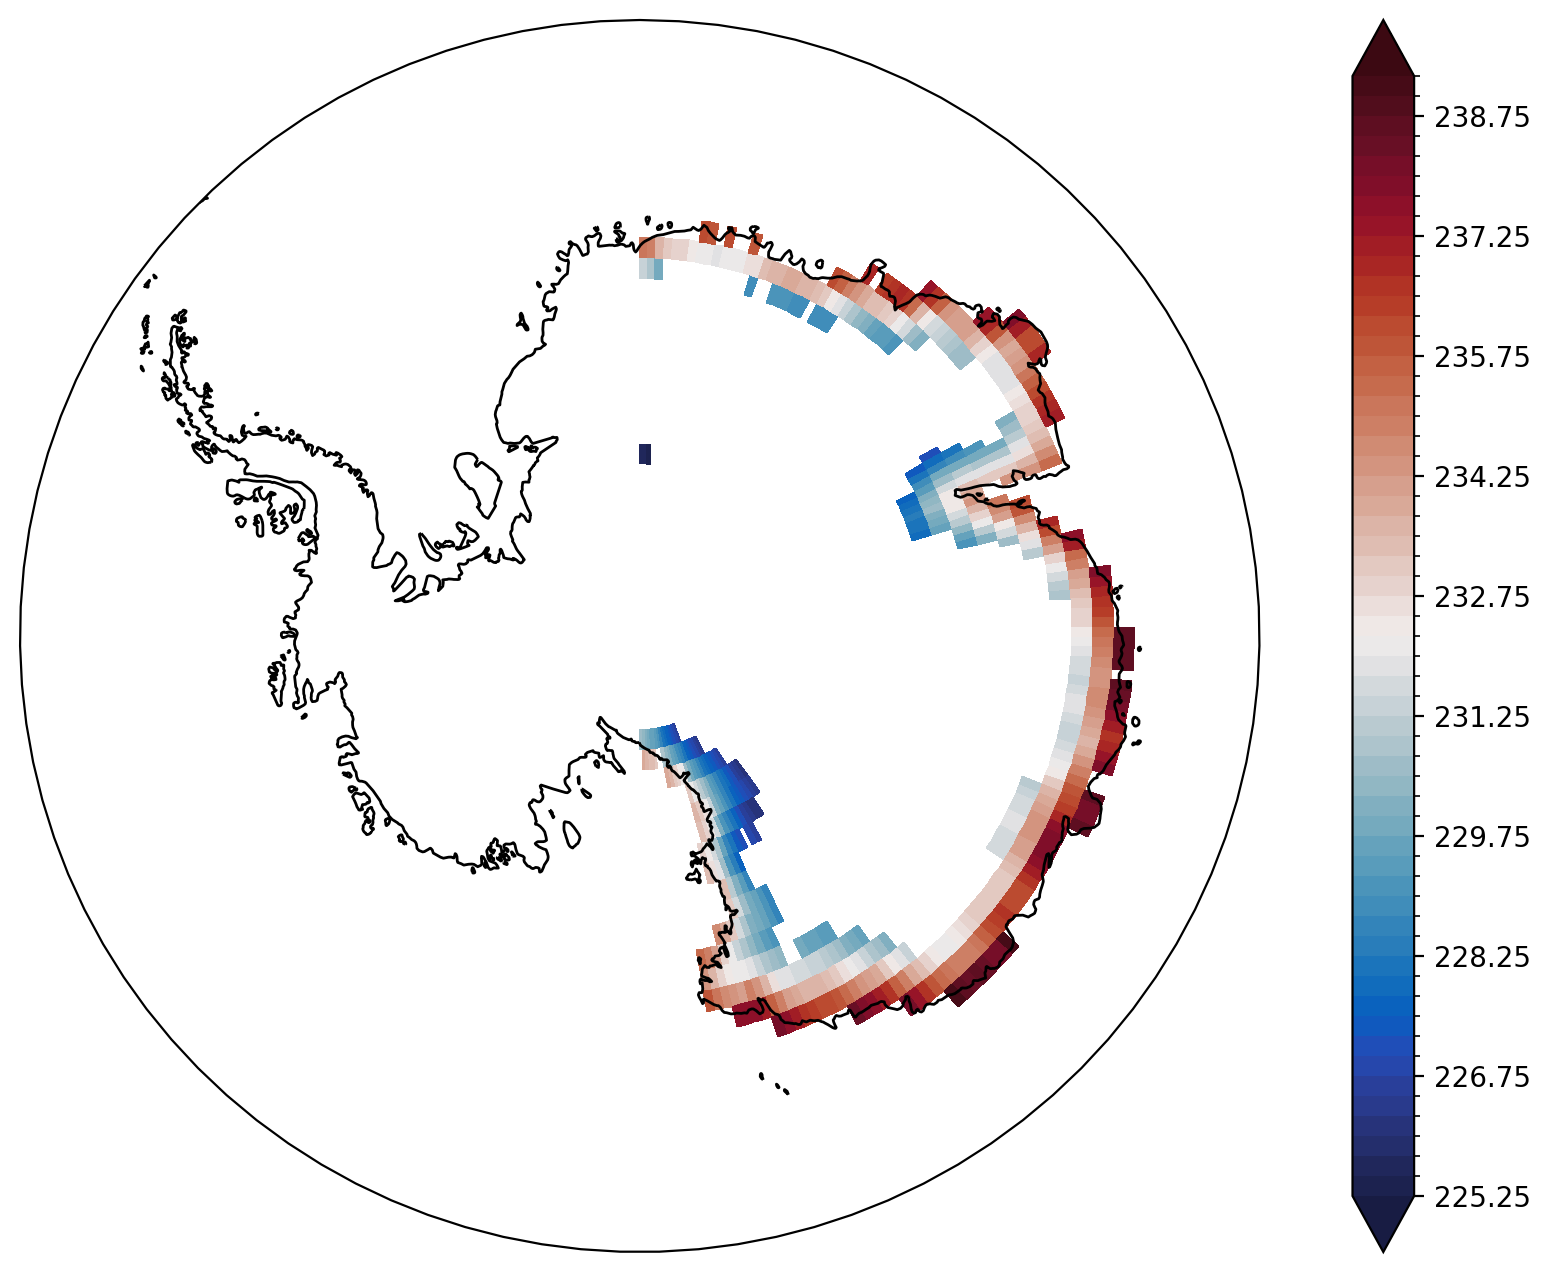

In [18]:

subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
loweast_test.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance, levels=60)



ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()


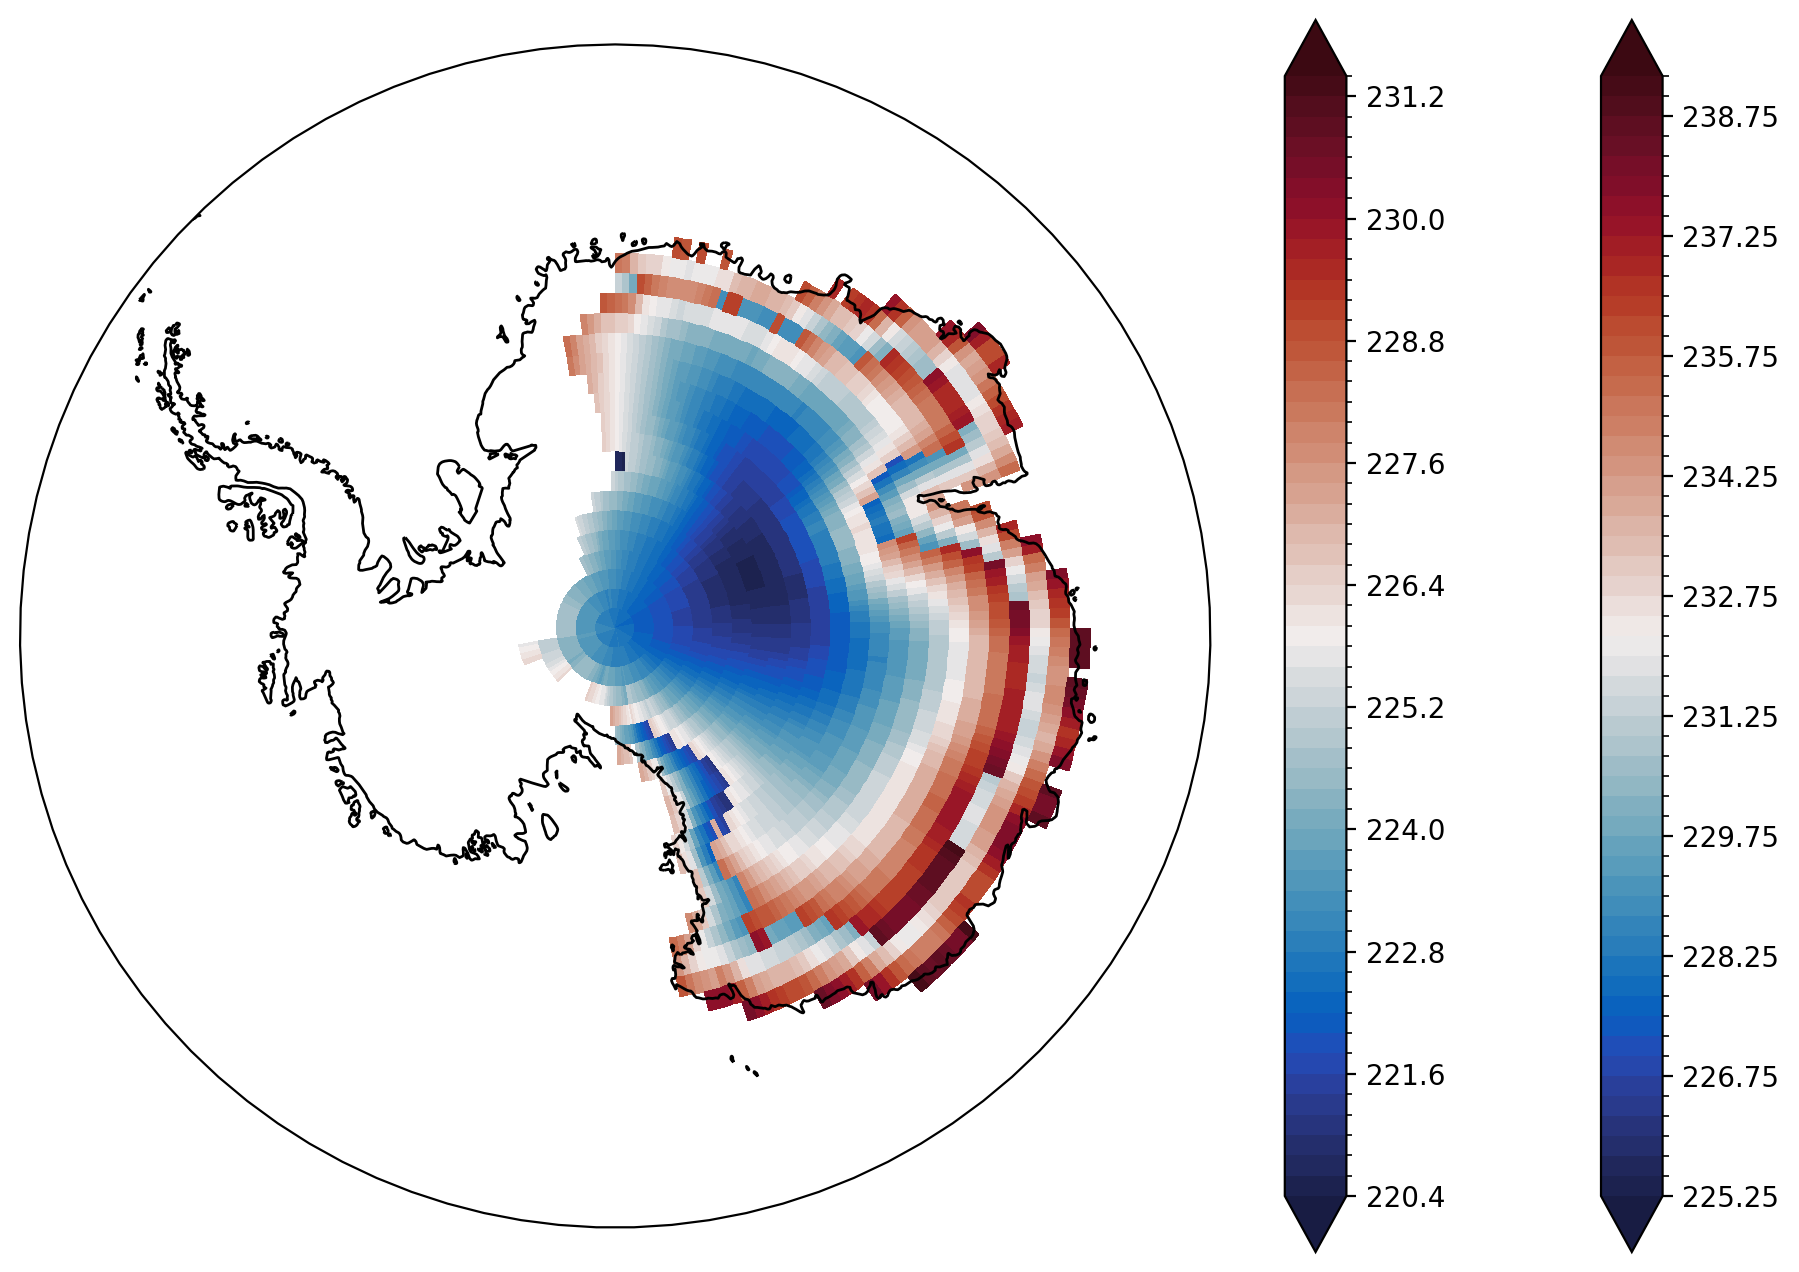

In [19]:
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
loweast_test.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance, levels=60)
plateau_test.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()


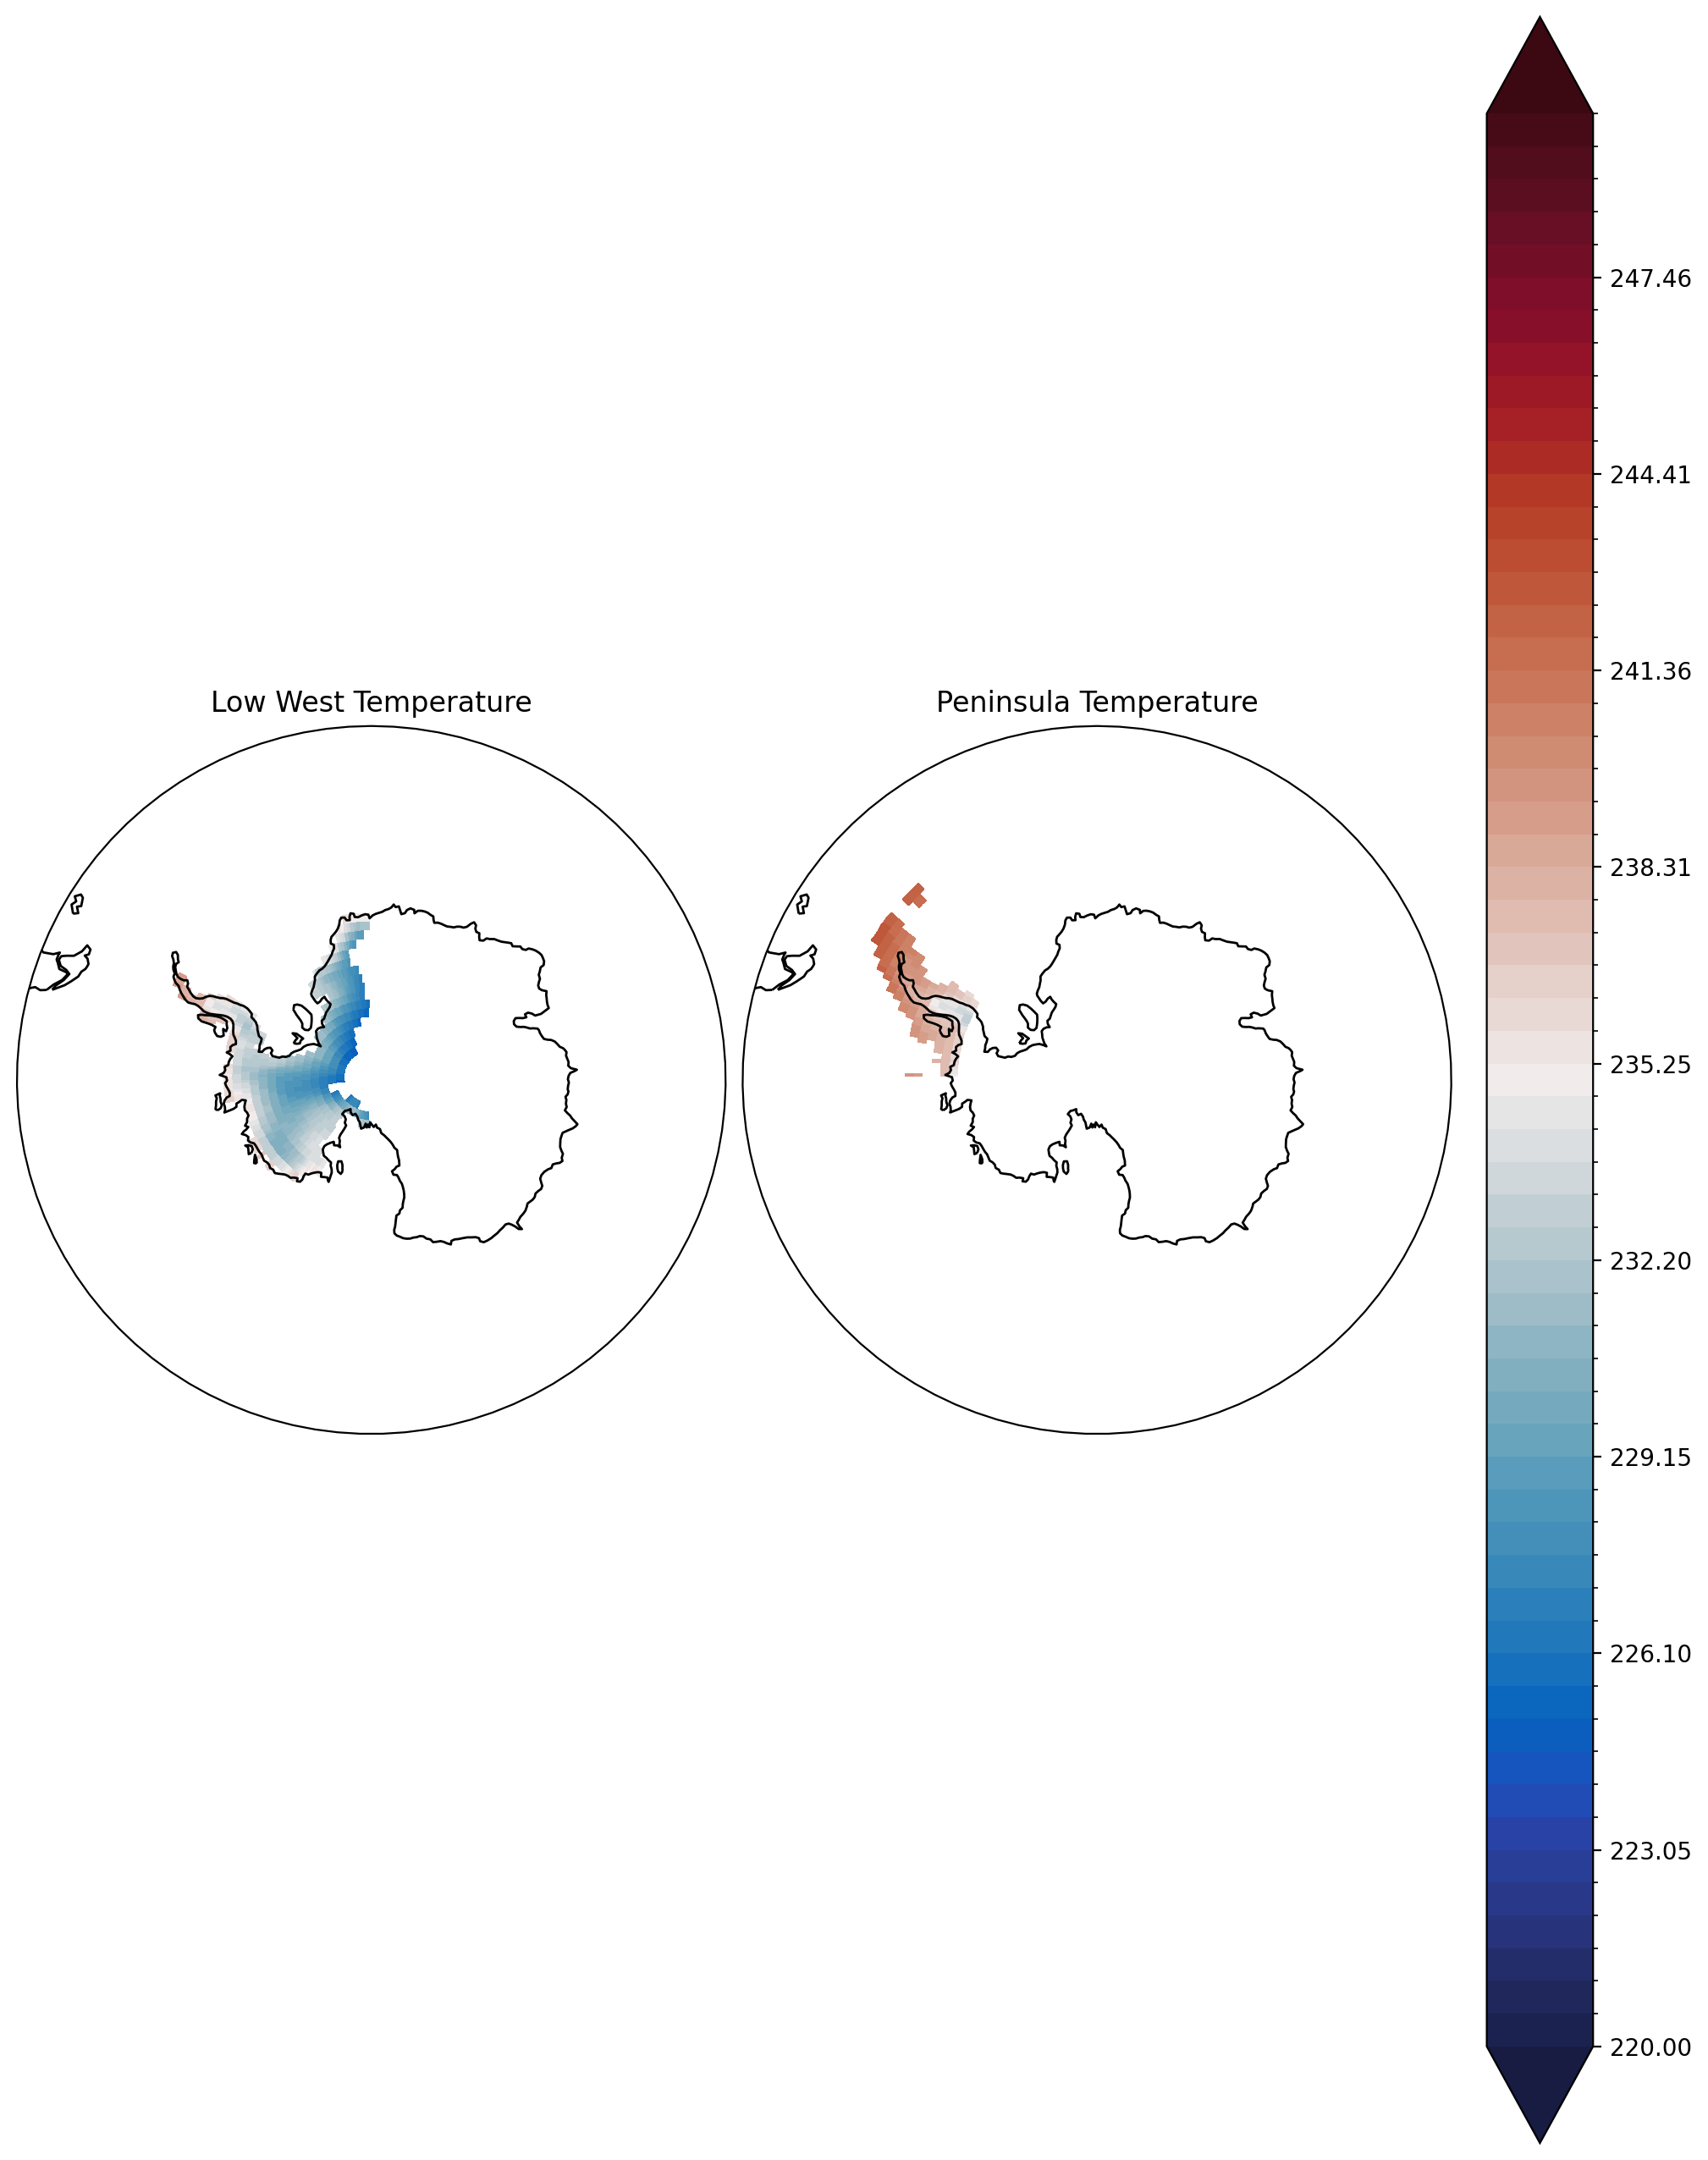

In [80]:
fig, ax = south_pole_map(cols=2, fig_size=(10,20))
lowwest_test.plot(ax=ax[0],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance,vmin=220, vmax=250,levels=60, add_colorbar=False)
peninsula_test.plot(ax=ax[1],
               transform =ccrs.PlateCarree(),
               extend='both',
               cmap=cmocean.cm.balance, vmin=220, vmax=250,levels=60)
ax[0].set_title('Low West Temperature')
ax[1].set_title('Peninsula Temperature')

for i in range(2):
    ax[i].coastlines()

In [34]:
temp_climatology = ml.util.annual_cycle(temp_CM4,tcoord='time')

In [141]:
#f_20= temp_CM4.sel(time=slice('0001-01-16', '0020-12-16'))
#l_20=temp_CM4.sel(time=slice('0330-01-16', '0350-12-16'))
temp_seasonal = temp_CM4.groupby('time.season').mean(dim='time')
temp_summer= temp_seasonal.sel(season= 'DJF')
temp_winter=temp_seasonal.sel(season='JJA')
temp_spring=temp_seasonal.sel(season='SON')
temp_fall=temp_seasonal.sel(season='MAM')

In [133]:
plateau_temp_summer=(temp_summer*(mask_CM4.plateau_CM4)).mean(dim='pfull')
ross_temp_summer=(temp_summer*(mask_CM4.ross_CM4)).mean(dim='pfull')
lowwest_temp_summer=(temp_summer*(mask_CM4.lowwest_CM4)).mean(dim='pfull')
loweast_temp_summer=(temp_summer*(mask_CM4.loweast_CM4)).mean(dim='pfull')
filchner_temp_summer=(temp_summer*(mask_CM4.filchner_CM4)).mean(dim='pfull')
peninsula_temp_summer=(temp_summer*(mask_CM4.peninsula_CM4)).mean(dim='pfull')

In [136]:
plateau_temp_winter=(temp_winter*(mask_CM4.plateau_CM4)).mean(dim='pfull')
ross_temp_winter=(temp_winter*(mask_CM4.ross_CM4)).mean(dim='pfull')
lowwest_temp_winter=(temp_winter*(mask_CM4.lowwest_CM4)).mean(dim='pfull')
loweast_temp_winter=(temp_winter*(mask_CM4.loweast_CM4)).mean(dim='pfull')
filchner_temp_winter=(temp_winter*(mask_CM4.filchner_CM4)).mean(dim='pfull')
peninsula_temp_winter=(temp_winter*(mask_CM4.peninsula_CM4)).mean(dim='pfull')

In [142]:
plateau_temp_spring=(temp_spring*(mask_CM4.plateau_CM4)).mean(dim='pfull')
ross_temp_spring=(temp_spring*(mask_CM4.ross_CM4)).mean(dim='pfull')
lowwest_temp_spring=(temp_spring*(mask_CM4.lowwest_CM4)).mean(dim='pfull')
loweast_temp_spring=(temp_spring*(mask_CM4.loweast_CM4)).mean(dim='pfull')
filchner_temp_spring=(temp_spring*(mask_CM4.filchner_CM4)).mean(dim='pfull')
peninsula_temp_spring=(temp_spring*(mask_CM4.peninsula_CM4)).mean(dim='pfull')

In [145]:
plateau_temp_fall=(temp_fall*(mask_CM4.plateau_CM4)).mean(dim='pfull')
ross_temp_fall=(temp_spring*(mask_CM4.ross_CM4)).mean(dim='pfull')
lowwest_temp_fall=(temp_fall*(mask_CM4.lowwest_CM4)).mean(dim='pfull')
loweast_temp_fall=(temp_fall*(mask_CM4.loweast_CM4)).mean(dim='pfull')
filchner_temp_fall=(temp_fall*(mask_CM4.filchner_CM4)).mean(dim='pfull')
peninsula_temp_fall=(temp_fall*(mask_CM4.peninsula_CM4)).mean(dim='pfull')

Text(0.5, 0.98, 'Temperature for Fall (Kelvin)')

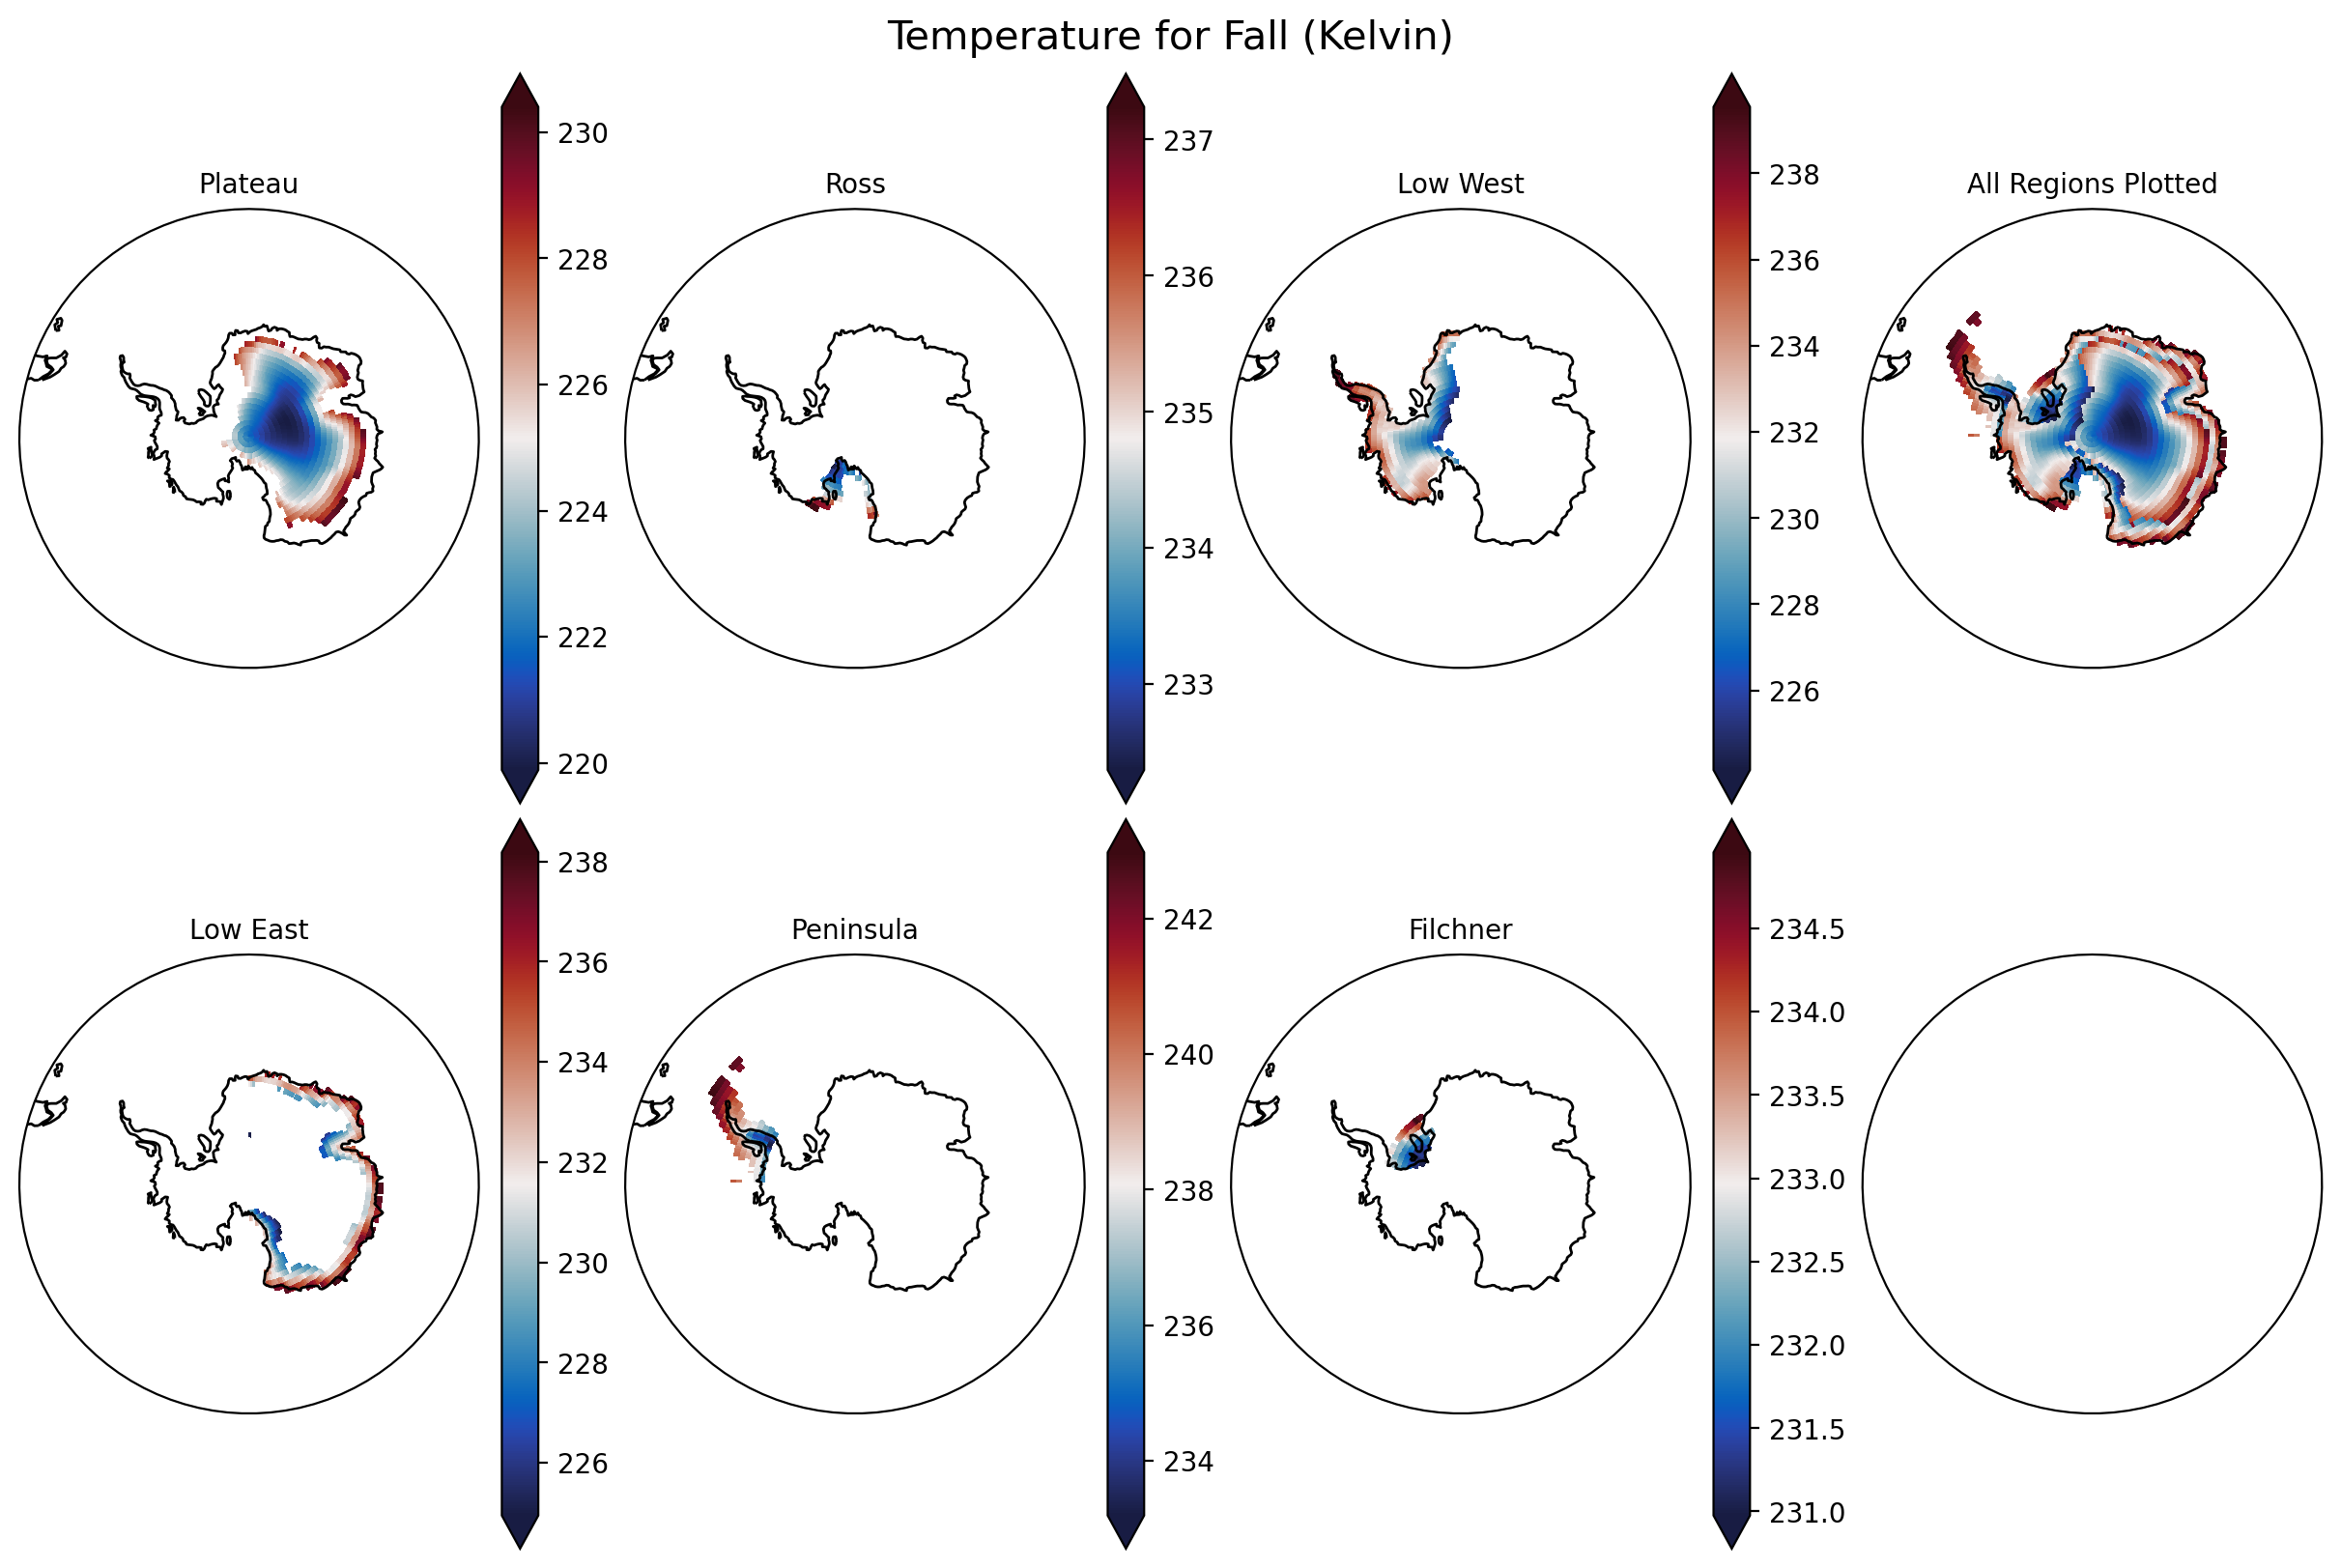

In [147]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(12,8))


plateau_temp_fall.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
    
ross_temp_fall.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
             
              extend='both',
              cmap=cmocean.cm.balance)
lowwest_temp_fall.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance)
    
loweast_temp_fall.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              
               extend='both',
               cmap= cmocean.cm.balance)
peninsula_temp_fall.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
filchner_temp_fall.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
plateau_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance, add_colorbar=False)

ross_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)


lowwest_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)

loweast_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)

filchner_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
                
               cmap=cmocean.cm.balance, add_colorbar=False)

peninsula_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Plateau',size=10)
ax[0,1].set_title('Ross',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Low East',size=10)
ax[1,1].set_title('Peninsula',size=10)
ax[1,2].set_title('Filchner',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)


fig.suptitle('Temperature for Fall (Kelvin)', fontsize=15)

Text(0.5, 0.98, 'Temperature for Spring (Kelvin)')

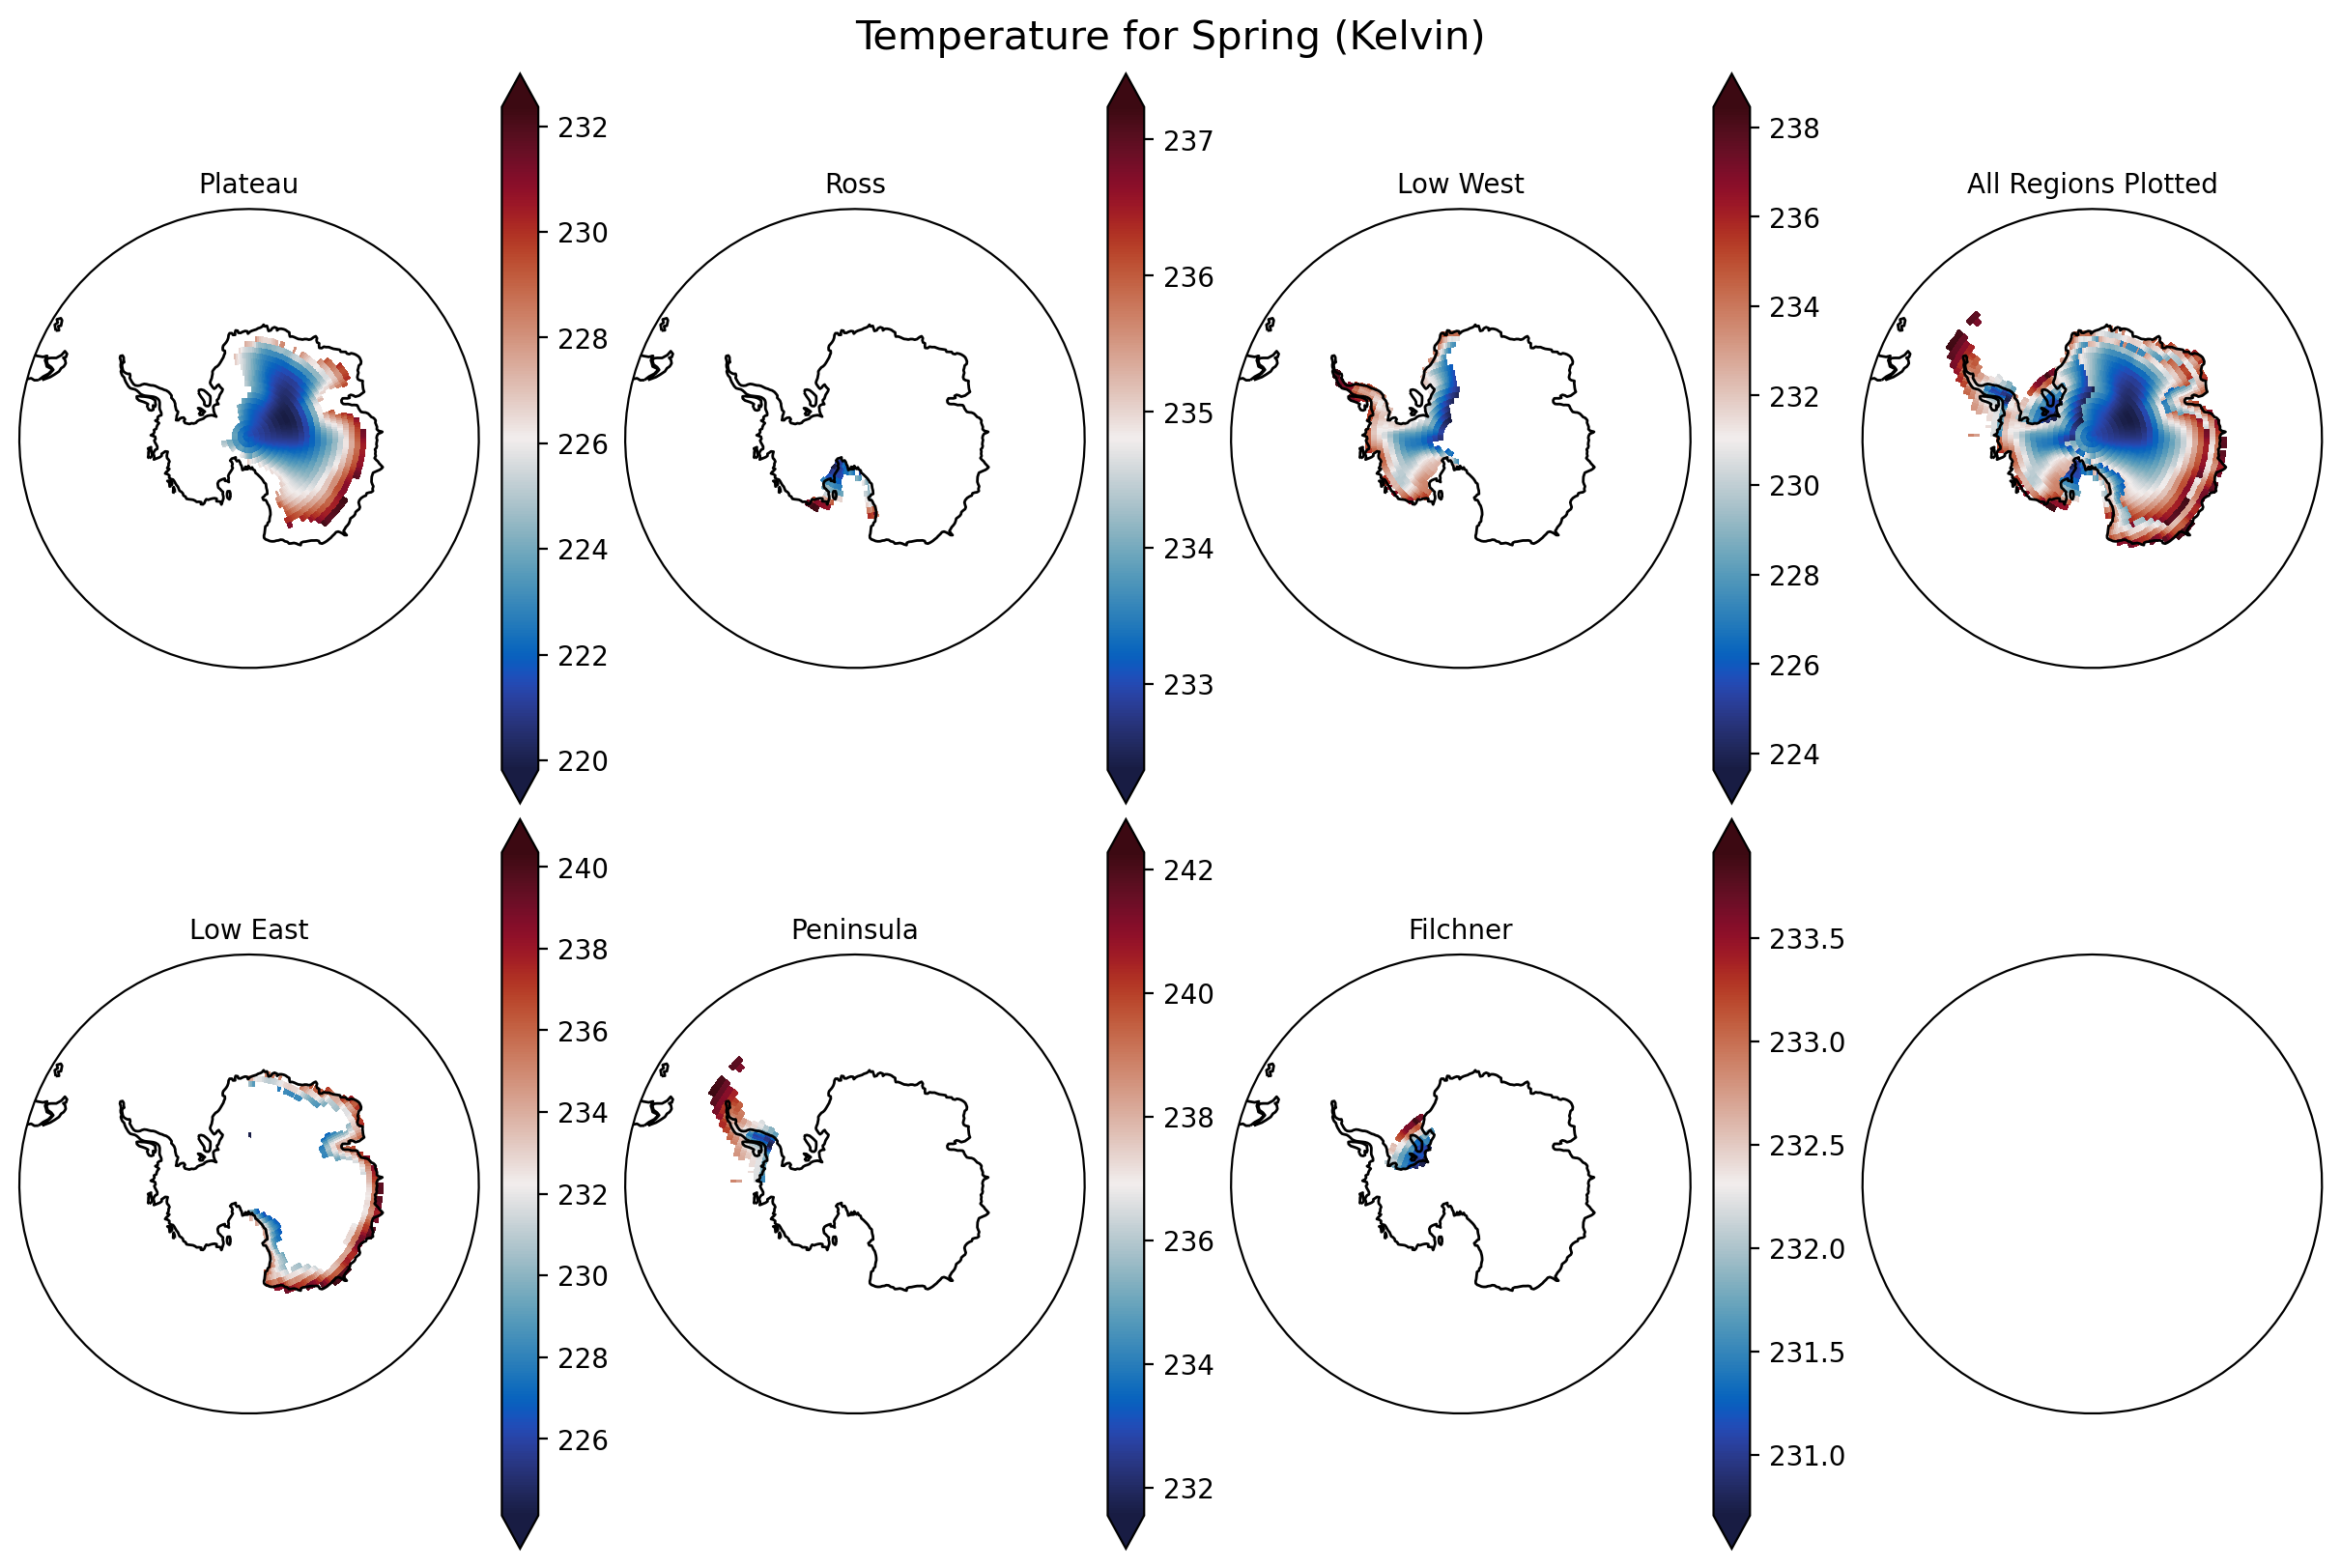

In [144]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(12,8))


plateau_temp_spring.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
    
ross_temp_spring.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
             
              extend='both',
              cmap=cmocean.cm.balance)
lowwest_temp_spring.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance)
    
loweast_temp_spring.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              
               extend='both',
               cmap= cmocean.cm.balance)
peninsula_temp_spring.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
filchner_temp_spring.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
plateau_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance, add_colorbar=False)

ross_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)


lowwest_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)

loweast_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)

filchner_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
                
               cmap=cmocean.cm.balance, add_colorbar=False)

peninsula_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Plateau',size=10)
ax[0,1].set_title('Ross',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Low East',size=10)
ax[1,1].set_title('Peninsula',size=10)
ax[1,2].set_title('Filchner',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)


fig.suptitle('Temperature for Spring (Kelvin)', fontsize=15)

Text(0.5, 0.98, 'Temperature for Summer (Kelvin)')

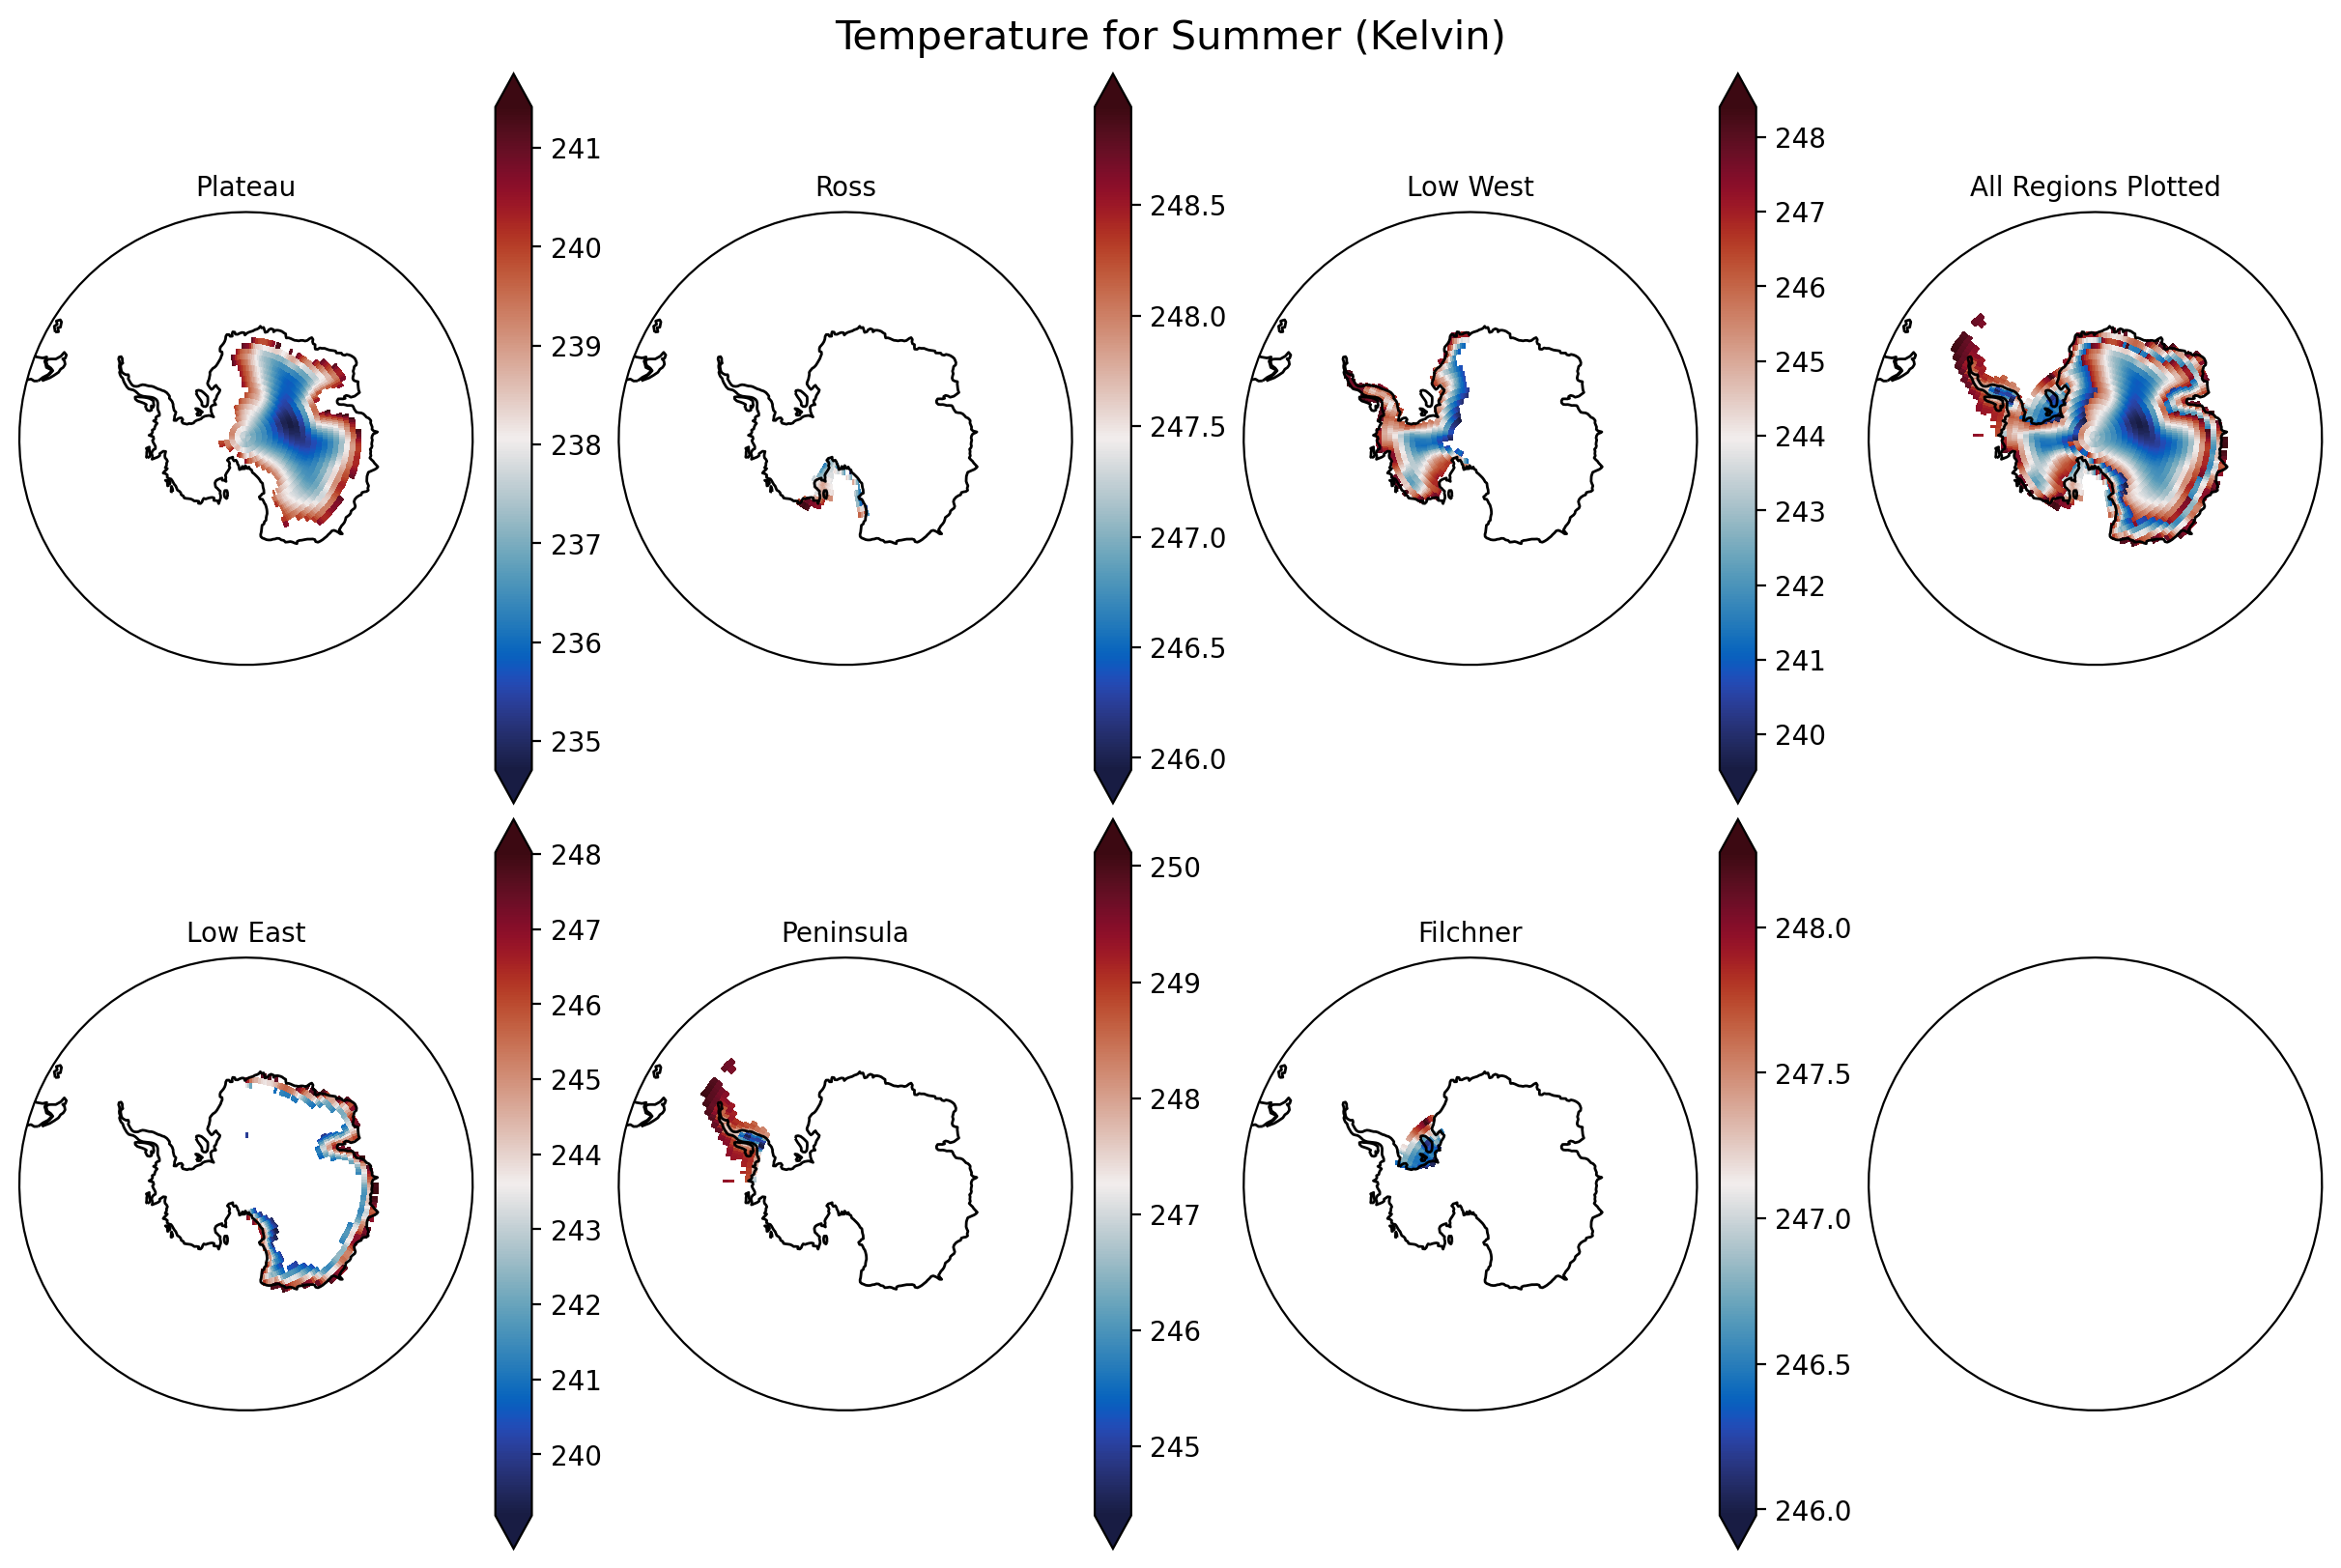

In [143]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(12,8))


plateau_temp_summer.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
    
ross_temp_summer.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
             
              extend='both',
              cmap=cmocean.cm.balance)
lowwest_temp_summer.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance)
    
loweast_temp_summer.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              
               extend='both',
               cmap= cmocean.cm.balance)
peninsula_temp_summer.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
filchner_temp_summer.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
plateau_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance, add_colorbar=False)

ross_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)


lowwest_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)

loweast_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)

filchner_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
                
               cmap=cmocean.cm.balance, add_colorbar=False)

peninsula_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Plateau',size=10)
ax[0,1].set_title('Ross',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Low East',size=10)
ax[1,1].set_title('Peninsula',size=10)
ax[1,2].set_title('Filchner',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)


fig.suptitle('Temperature for Summer (Kelvin)', fontsize=15)

Text(0.5, 0.98, 'Temperature for Winter (Kelvin)')

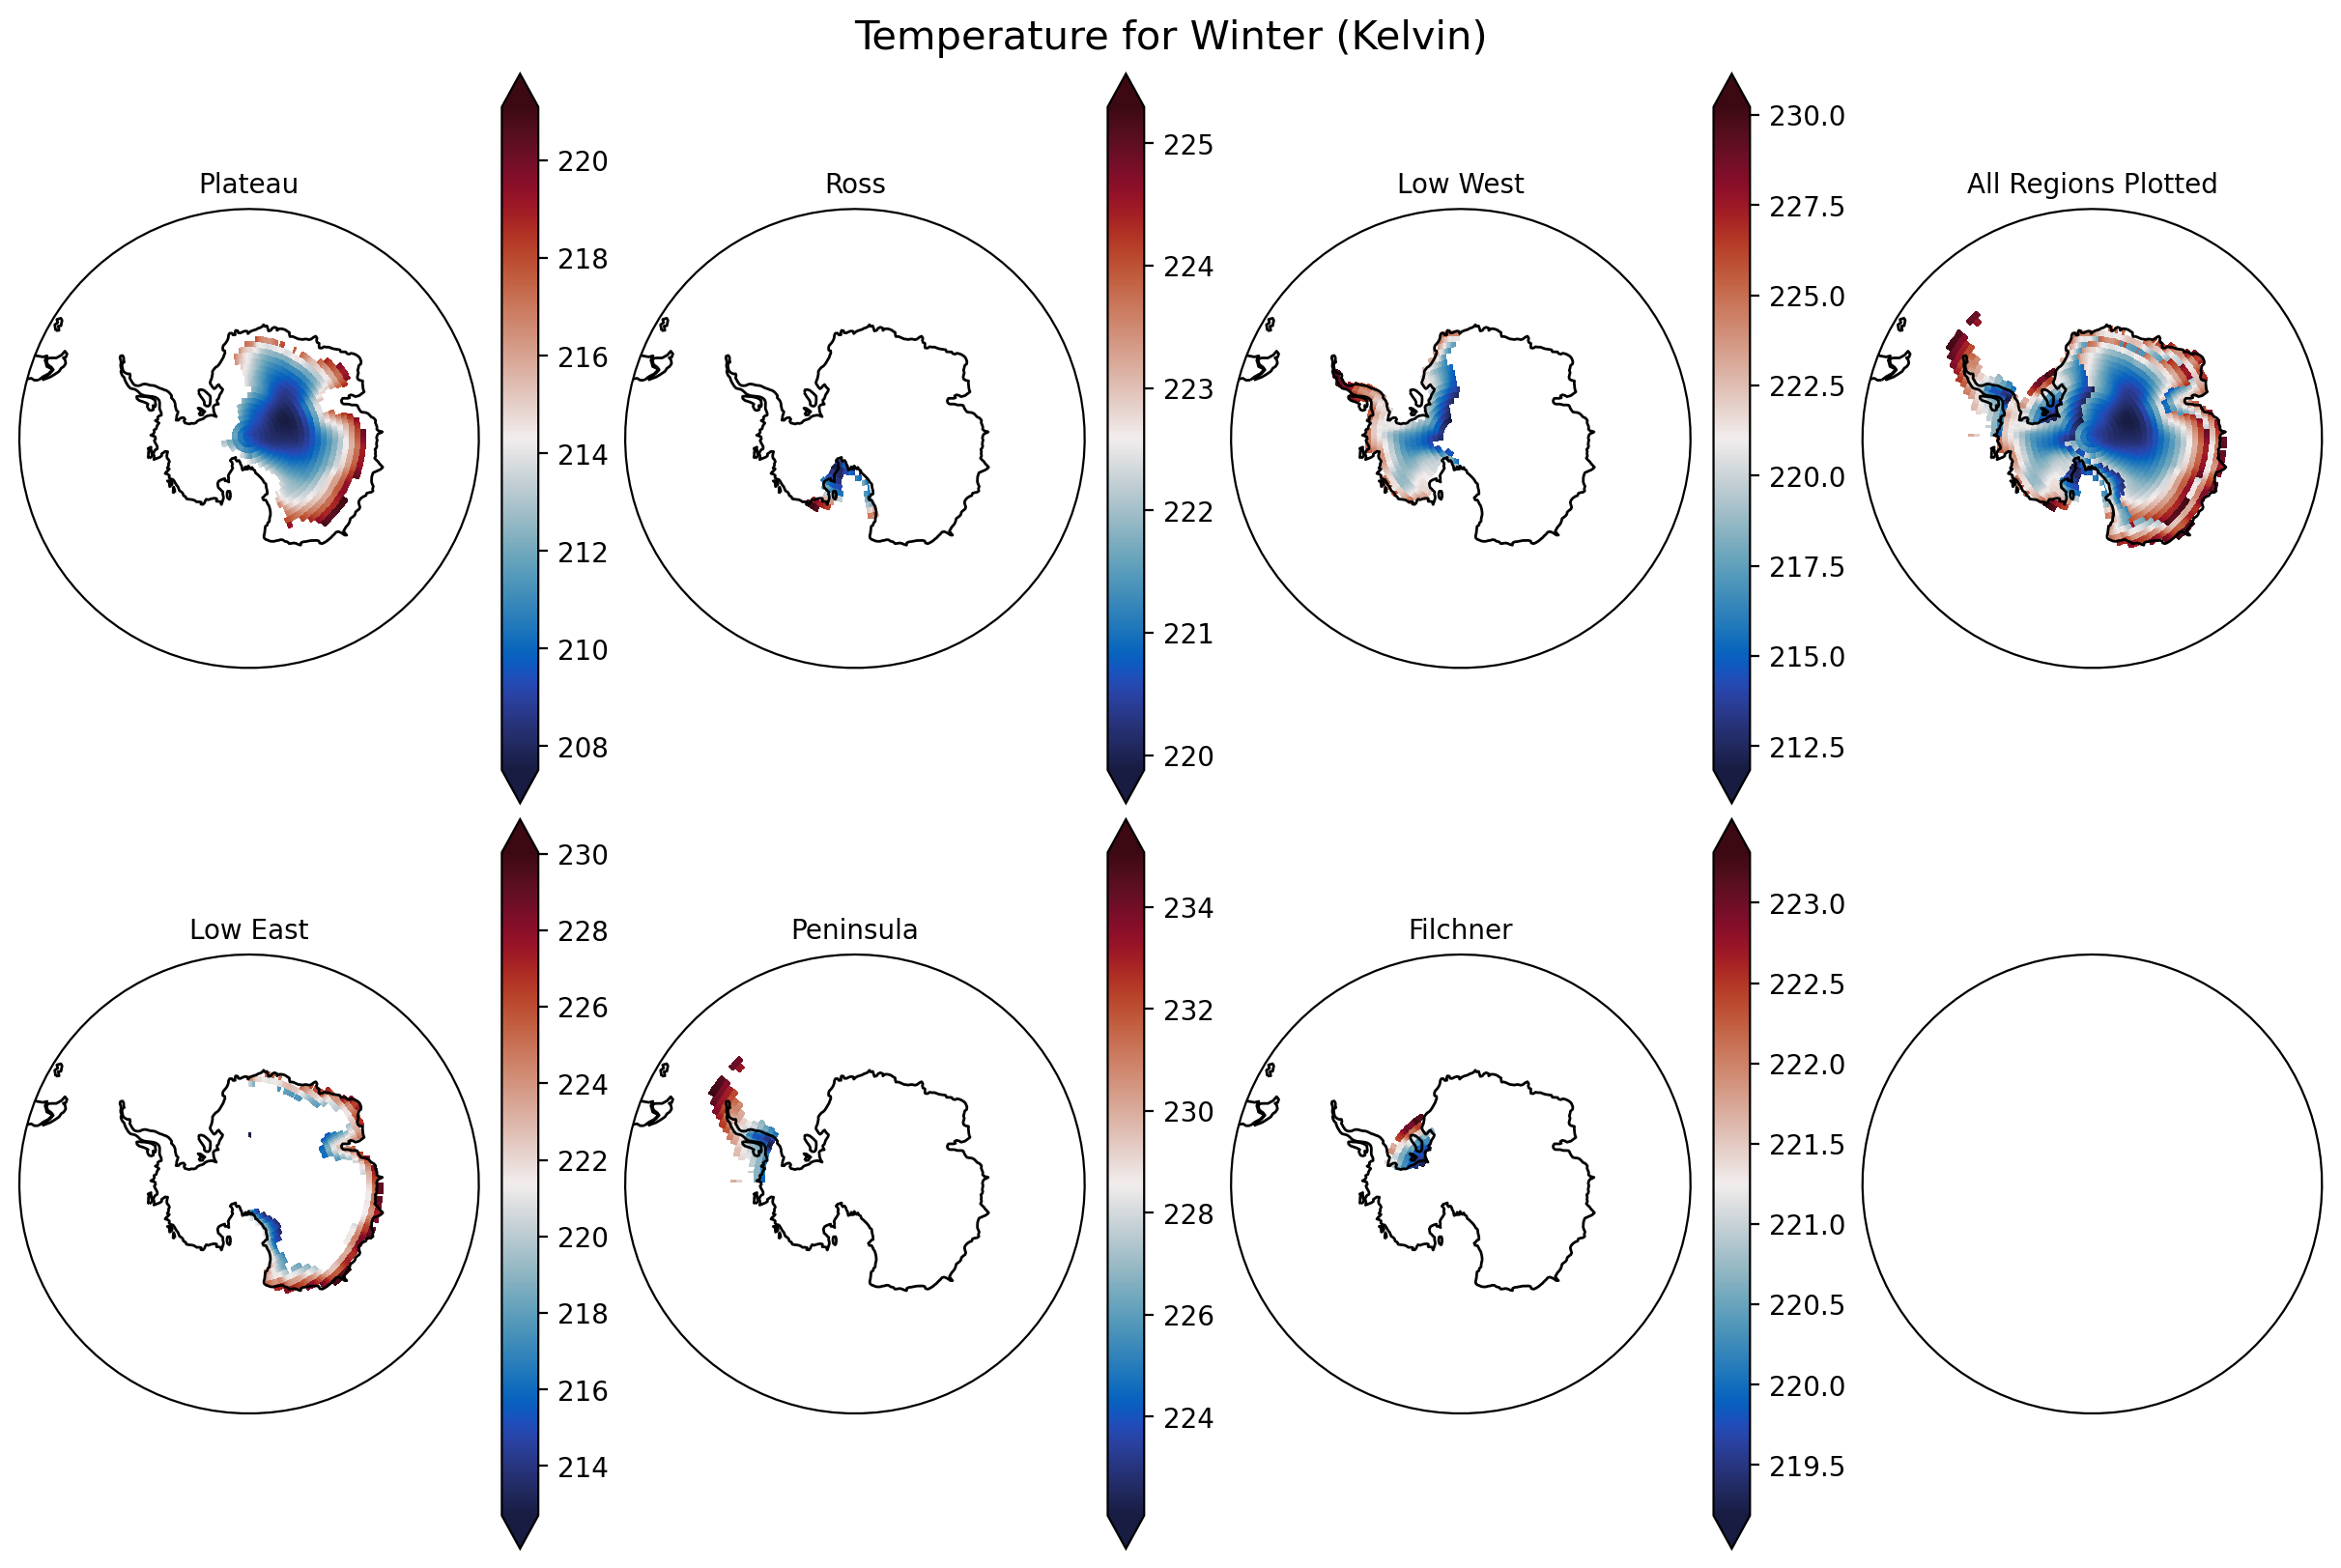

In [138]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(12,8))


plateau_temp_winter.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
    
ross_temp_winter.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
             
              extend='both',
              cmap=cmocean.cm.balance)
lowwest_temp_winter.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance)
    
loweast_temp_winter.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              
               extend='both',
               cmap= cmocean.cm.balance)
peninsula_temp_winter.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
filchner_temp_winter.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
plateau_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance, add_colorbar=False)

ross_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)


lowwest_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)

loweast_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)

filchner_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
                
               cmap=cmocean.cm.balance, add_colorbar=False)

peninsula_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Plateau',size=10)
ax[0,1].set_title('Ross',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Low East',size=10)
ax[1,1].set_title('Peninsula',size=10)
ax[1,2].set_title('Filchner',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)


fig.suptitle('Temperature for Winter (Kelvin)', fontsize=15)